# Mid term group work

analyse overtime
across categories
both exploration and presentation style

1. the general tendency of the focal variable over time (e.g., the
   trajectory of popularity of the average 'pop' album);
2. the distribution of the focal variable at multiple points in time;
3. the evolution of the focal variable for specific cases (e.g.,
   specific products);
4. the differences/similarities in 1, 2, and 3 across categories of
   entities (e.g., types of products).

the trajectory in the count of ratings received by product across time 
      (since the very first score up to six months later; exclude products whose 
      first score has been posted by less than six months);
  - the association between the trajectory in the count of ratings and 
      product attributes (e.g., product-market category, price);
  - the association between the trajectory in the count of ratings and 
      the timing/pace with which ratings are posted.

The **audience** for this chart is a team of experienced marketing
analysts who want to understand how/why attention (measured in terms of count of
ratings) develops around new products.  The chart is meant to serve both
exploration and presentations goals – analysts will use it (i) to
speculate about the factors that account for the trajectory in the
count of ratings; (ii) to update their client with a PowerPoint alike
slide-show.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use('fivethirtyeight')

<b> Review </b>
- <i>reviewerID </i> - ID of the reviewer, e.g. A2SUAM1J3GNN3B

- <i>asin</i> - ID of the product, e.g. 0000013714
- <i>reviewerName</i> - name of the reviewer
- <i>helpful</i> - helpfulness rating of the review, e.g. 2/3
- <i>reviewText</i> - text of the review
- <i>overall</i> - rating of the product
- <i>summary</i> - summary of the review
- <i>unixReviewTime</i> - time of the review (unix time)
- <i>reviewTime</i> - time of the review (raw)

<b> Metadata </b>
- <i>asin</i> - ID of the product, e.g. 0000031852
- <i>title</i> - name of the product
- <i>price</i> - price in US dollars (at time of crawl)
- <i>imUrl</i> - url of the product image
- <i>related</i> - related products (also bought, also viewed, bought together, buy after viewing)
- <i>salesRank</i> - sales rank information
- <i>brand</i> - brand name
- <i>categories</i> - list of categories the product belongs to

In [2]:
##unzip json.gz to json file

#import sh
#sh.gunzip("meta_Digital_Music.json.gz")
#sh.gunzip("Digital_Music.json.gz")

In [3]:
Meta = 'meta_Digital_Music.json'
Metadata = pd.io.json.json_normalize([json.loads(line) for line in open(Meta)])

In [4]:
Rev = 'Digital_Music.json'
Review = pd.io.json.json_normalize([json.loads(line) for line in open(Rev)])

In [5]:
Review.head().T

,0,1,2,3,4
overall,5,5,5,5,5
verified,True,True,True,True,False
reviewTime,"12 22, 2013","09 11, 2013","03 2, 2013","12 2, 2012","01 7, 2012"
reviewerID,A1ZCPG3D3HGRSS,AC2PL52NKPL29,A1SUZXBDZSDQ3A,A3A0W7FZXM0IZW,A12R54MKO17TW0
asin,0001388703,0001388703,0001388703,0001388703,0001388703
reviewerName,mark l. massey,Norma Mushen,Herbert W. Shurley,Mary M Raybell,J. Bynum
reviewText,This is a great cd full of worship favorites!!...,"So creative! Love his music - the words, the ...","Keith Green, gone far to early in his carreer,...",Keith Green had his special comedy style of Ch...,Keith Green / So you wanna go back to Egypt......
summary,Great worship cd,Gotta listen to this!,Great approach still gets the message out,Great A must have,A great one from Keith with a guest appearance...
unixReviewTime,1387670400,1378857600,1362182400,1354406400,1325894400
style.Format:,Audio CD,Audio CD,Audio CD,Audio CD,Audio CD


In [6]:
Review.loc[:,'count'] =1

In [7]:
Review['overall'].dropna(inplace=True)

In [8]:
gr_asin = Review.groupby('asin')
gr_count = Review.groupby('count')
gr_format = Review.groupby('style.Format:')

In [9]:
countreview = pd.DataFrame(gr_format['count'].aggregate(np.sum))
avg_review = pd.DataFrame(gr_format['overall'].aggregate(np.mean))

df = pd.concat([avg_review,countreview], axis=1)

In [10]:
remove = df[df['count'] < 100 ].index
df.drop(remove,inplace=True)

In [11]:
df.reset_index(inplace=True)

X = df['style.Format:']

Y1 = df['count']
Y2 = df['overall']

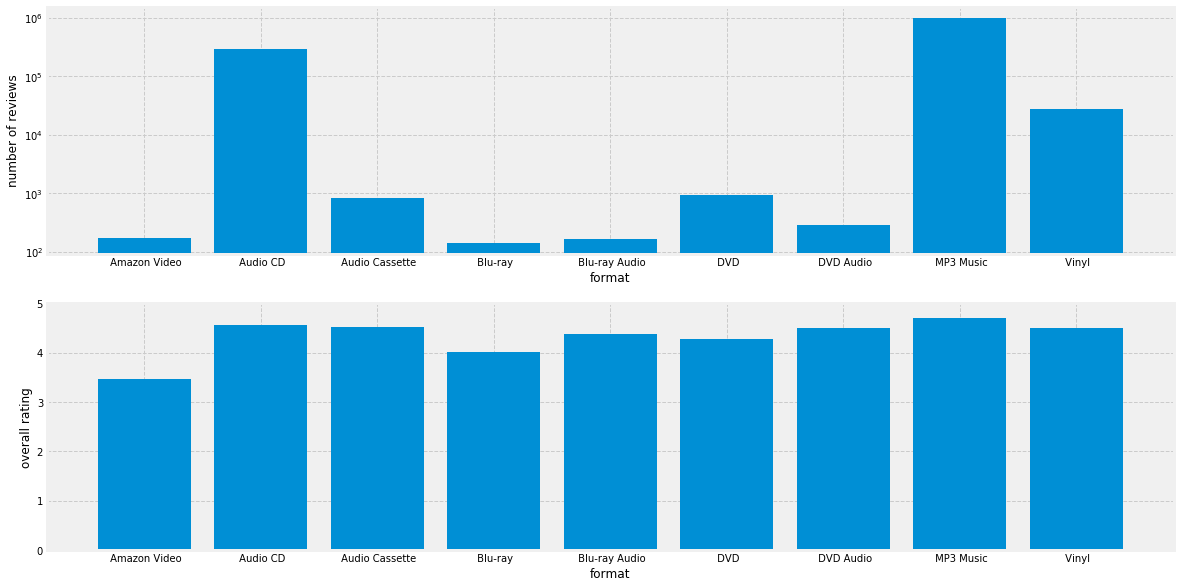

In [12]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.bar(X,Y1, log=True)
ax1.set_xlabel('format')
ax1.set_ylabel('number of reviews')
ax1.grid(ls='--')

ax2.bar(X,Y2)
ax2.set_ylim(0,5)
ax2.set_xlabel('format')
ax2.set_ylabel('overall rating')
ax2.grid(ls='--')

In [13]:
Review.loc[:,'timestamp'] = pd.to_datetime(
    Review['reviewTime'],
    format = '%m %d, %Y'
)

In [14]:
Review.loc[:,'month'] = Review['timestamp'].dt.month
Review.loc[:,'year'] = Review['timestamp'].dt.year

In [31]:
gr_year = Review.groupby(['style.Format:','year'])

In [16]:
df2 = pd.DataFrame(gr_year['overall'].agg(np.mean))

df2.drop(remove,inplace=True)
df2.reset_index(inplace=True)

In [18]:
df2.head(10)

,style.Format:,year,overall
0,Amazon Video,2010,3.600000
1,Amazon Video,2011,2.200000
2,Amazon Video,2012,3.857143
3,Amazon Video,2013,3.368421
4,Amazon Video,2014,3.562500
5,Amazon Video,2015,3.723404
6,Amazon Video,2016,3.727273
7,Amazon Video,2017,3.277778
8,Amazon Video,2018,2.750000
9,Audio CD,1997,5.000000


In [19]:
x = np.arange(1997,2019,1)
x

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [20]:
x = df2['year']
y = df2['overall']

In [21]:

x1 = x[:9]
y1 = y[:9]

x2 = x[9:31]
y2 = y[9:31]

x3 = x[31:50]
y3 = y[31:50]

x4 = x[50:60]
y4 = y[50:60]

x5 = x[60:67]
y5 = y[60:67]

x6 = x[67:79]
y6 = y[67:79]

x7 = x[79:92]
y7 = y[79:92]

x8 = x[92:107]
y8 = y[92:107]

x9 = x[107:]
y9 = y[107:]

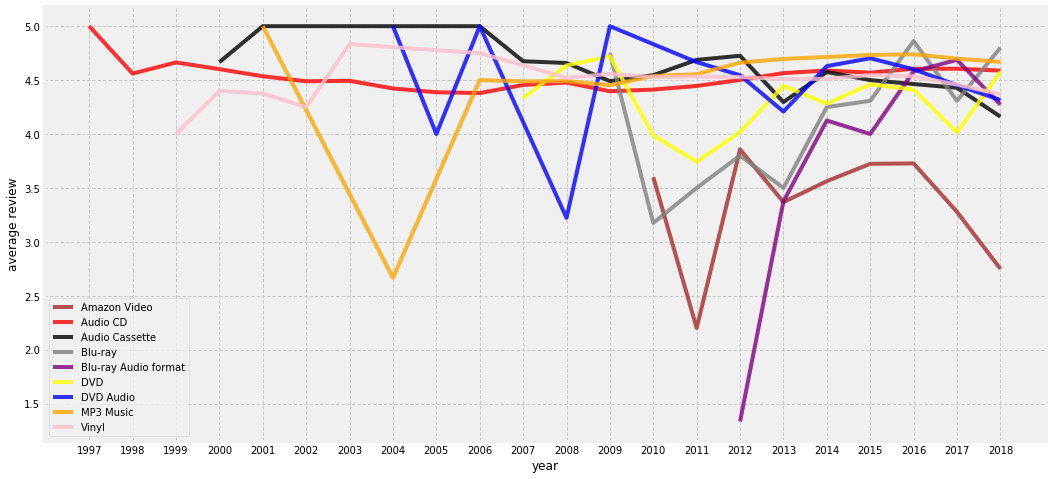

In [22]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111,xticks=list(np.arange(1997,2019,1)), xticklabels= list(np.arange(1997,2019,1)))

ax.plot(x1,y1,c='brown', alpha=0.8, label='Amazon Video')
ax.plot(x2,y2, c='red', alpha=0.8,label='Audio CD')
ax.plot(x3,y3, c='black', alpha=0.8,label='Audio Cassette')
ax.plot(x4,y4, c='grey', alpha=0.8,label='Blu-ray')
ax.plot(x5,y5, c='purple', alpha=0.8,label='Blu-ray Audio format')
ax.plot(x6,y6, c='yellow', alpha=0.8,label='DVD')
ax.plot(x7,y7, c='blue', alpha=0.8,label='DVD Audio')
ax.plot(x8,y8, c='orange', alpha=0.8,label='MP3 Music')
ax.plot(x9,y9, c='pink', alpha=0.8,label='Vinyl')


ax.set_xlabel('year')
ax.set_ylabel('average review')
ax.legend(loc='best')
ax.grid(ls='--')


plt.show()

In [32]:
df3 = pd.DataFrame(gr_year['count'].agg(np.sum))

df3.drop(remove,inplace=True)
df3.reset_index(inplace=True)

In [30]:
df3

,style.Format:,year,count
0,Amazon Video,2010,5
1,Amazon Video,2011,5
2,Amazon Video,2012,7
3,Amazon Video,2013,19
4,Amazon Video,2014,32
...,...,...,...
120,Vinyl,2014,3183
121,Vinyl,2015,5298
122,Vinyl,2016,6280
123,Vinyl,2017,4456


In [42]:
x = df3['year']
y = df3['count']

In [43]:

x1 = x[:9]
y1 = y[:9]

x2 = x[9:31]
y2 = y[9:31]

x3 = x[31:50]
y3 = y[31:50]

x4 = x[50:60]
y4 = y[50:60]

x5 = x[60:67]
y5 = y[60:67]

x6 = x[67:79]
y6 = y[67:79]

x7 = x[79:92]
y7 = y[79:92]

x8 = x[92:107]
y8 = y[92:107]

x9 = x[107:]
y9 = y[107:]

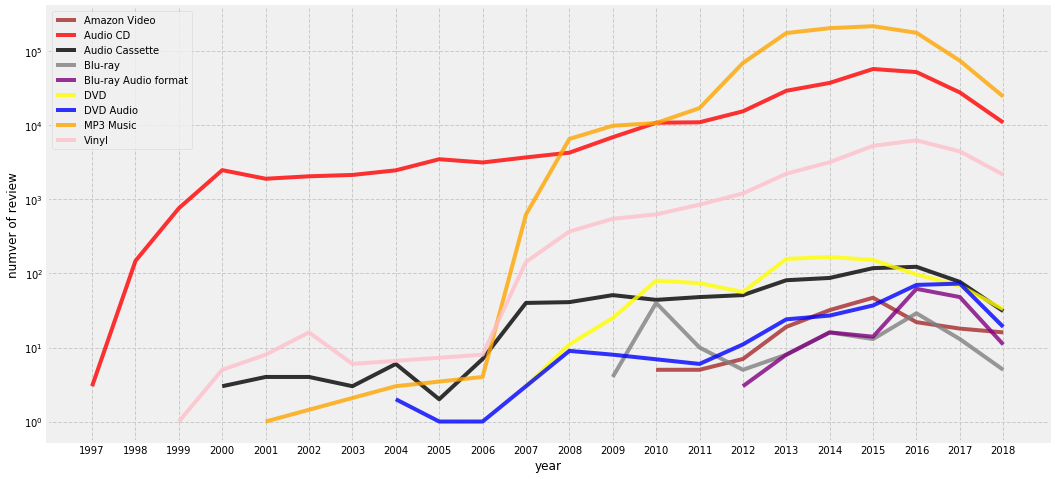

In [37]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111,xticks=list(np.arange(1997,2019,1)), xticklabels= list(np.arange(1997,2019,1)))

ax.plot(x1,y1,c='brown', alpha=0.8, label='Amazon Video')
ax.plot(x2,y2, c='red', alpha=0.8,label='Audio CD')
ax.plot(x3,y3, c='black', alpha=0.8,label='Audio Cassette')
ax.plot(x4,y4, c='grey', alpha=0.8,label='Blu-ray')
ax.plot(x5,y5, c='purple', alpha=0.8,label='Blu-ray Audio format')
ax.plot(x6,y6, c='yellow', alpha=0.8,label='DVD')
ax.plot(x7,y7, c='blue', alpha=0.8,label='DVD Audio')
ax.plot(x8,y8, c='orange', alpha=0.8,label='MP3 Music')
ax.plot(x9,y9, c='pink', alpha=0.8,label='Vinyl')

ax.set_yscale('log')
ax.set_xlabel('year')
ax.set_ylabel('numver of review')
ax.legend(loc='best')
ax.grid(ls='--')


plt.show()

In [47]:
y1 = np.cumsum(y1)
y2 = np.cumsum(y2)
y3 = np.cumsum(y3)
y4 = np.cumsum(y4)
y5 = np.cumsum(y5)
y6 = np.cumsum(y6)
y7 = np.cumsum(y7)
y8 = np.cumsum(y8)
y9 = np.cumsum(y9)

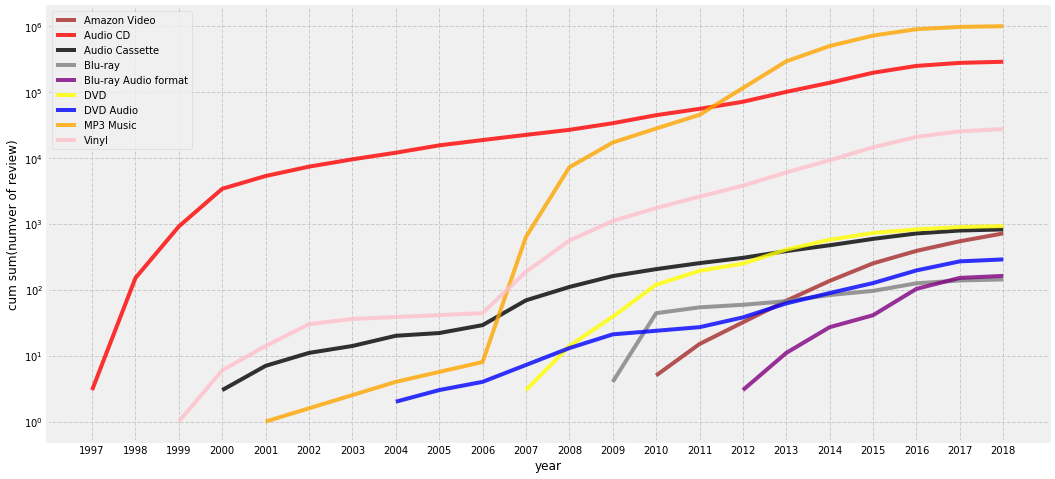

In [49]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111,xticks=list(np.arange(1997,2019,1)), xticklabels= list(np.arange(1997,2019,1)))

ax.plot(x1,y1,c='brown', alpha=0.8, label='Amazon Video')
ax.plot(x2,y2, c='red', alpha=0.8,label='Audio CD')
ax.plot(x3,y3, c='black', alpha=0.8,label='Audio Cassette')
ax.plot(x4,y4, c='grey', alpha=0.8,label='Blu-ray')
ax.plot(x5,y5, c='purple', alpha=0.8,label='Blu-ray Audio format')
ax.plot(x6,y6, c='yellow', alpha=0.8,label='DVD')
ax.plot(x7,y7, c='blue', alpha=0.8,label='DVD Audio')
ax.plot(x8,y8, c='orange', alpha=0.8,label='MP3 Music')
ax.plot(x9,y9, c='pink', alpha=0.8,label='Vinyl')

ax.set_yscale('log')
ax.set_xlabel('year')
ax.set_ylabel('cum sum(numver of review)')
ax.legend(loc='best')
ax.grid(ls='--')


plt.show()

In [23]:
Metadata.head()

,title,also_buy,brand,rank,also_view,price,asin,description,image,details,date,feature,category,main_cat
0,Master Collection Volume One,"[B000002UEN, B000008LD5, B01J804JKE, 747403435...",John Michael Talbot,"58,291inCDsVinyl(","[B000002UEN, B000008LD5, 7474034352, B000008LD...",$18.99,0001377647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hymns Collection: Hymns 1 & 2,"[5558154950, B00014K5V4]",Second Chapter of Acts,"93,164inCDsVinyl(","[B000008KJ3, B000008KJ0, 5558154950, B000UN8KZ...",NaN,0001529145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Early Works - Don Francisco,"[B00004RC05, B003H8F4NA, B003ZFVHPO, B003JMP1Z...",Don Francisco,"875,825inCDsVinyl(","[B003H8F4NA, B003ZFVHPO, B003JMP1ZK, B00004RC0...",NaN,0001527134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,So You Wanna Go Back to Egypt,"[B0000275QQ, 0001393774, 0001388312, B0016CP2G...",Keith Green,"203,263inCDsVinyl(","[B00000I7JO, B0016CP2GS, 0001393774, B0000275Q...",$13.01,0001388703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Early Works - Dallas Holm,"[B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...",Dallas Holm,"399,269inCDsVinyl(","[B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...",NaN,0001526146,[1. Losing Game 2. I Can't Wait 3. Didn't He S...,NaN,NaN,NaN,NaN,NaN,NaN
